# Autoencoders

## Introduction

This notebook provides a comprehensive guide on building and training an autoencoder using TensorFlow and Keras, aimed at handling image compression and reconstruction tasks. It demonstrates the entire workflow from loading and preprocessing data, specifically the MNIST dataset and custom images, to defining and compiling the autoencoder's architecture. Detailed steps include reshaping and normalizing the images to suit the model's input requirements and setting up the model with appropriate dense layers and activation functions. The notebook also emphasizes the training process, visual evaluation of the model's performance by comparing original and reconstructed images, and concludes with instructions on saving the trained model. This guide serves as a practical introduction to applying deep learning techniques for image processing tasks, highlighting key aspects of model training and evaluation.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

Here we are importing several libraries essential for numerical operations, plotting, and deep learning in Python. It includes NumPy, referred to with the alias `np`, which is crucial for handling numerical data operations like matrix arithmetic. The `pyplot` module from the `matplotlib` library, aliased as `plt`, is imported for creating a range of visualizations, from static charts to interactive plots. The code also imports the `keras` API from the TensorFlow library, a popular framework for building and training deep learning models. Additionally, the MNIST dataset, a standard set of handwritten digits used in image processing models, is imported from TensorFlow's Keras implementation, setting the stage for developing a model to recognize these digits.

## Load and normalize our data

In [2]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


It loads the MNIST dataset and processes it for training a neural network model. Initially, the MNIST dataset is loaded, separating it into training and test datasets containing images and their respective labels. The shapes of the training and test image datasets are printed, showing 60,000 training images and 10,000 test images, each image of size 28x28 pixels.

The images are then reshaped or flattened from a 2D format of 28x28 pixels to a 1D format of 784 pixels. This transformation is necessary because the input layer of the neural network model, in this case likely an autoencoder, requires a flat input vector. After reshaping, the new shapes of the datasets are printed, confirming that each image is now represented as a single row of 784 features.

Furthermore, the images are normalized to ensure that pixel values, originally ranging from 0 to 255, are scaled down to a range between 0 and 1. This normalization step helps in speeding up the learning process of the model by maintaining numerical stability and improving performance.

## loading the autoencoder model that has been pretrained in class  

In [3]:
# Using Autoencoder from Tutorial1-Autoencoder-Create Noteboook
autoencoder = keras.models.load_model("C:/Users/vadla/Downloads/initially_trained_autoencoder.h5")

It loads a pretrained autoencoder model from a specified file path on the user's local machine. The model file, named `initially_trained_autoencoder.h5`, is located in the Downloads directory of the user "vadla". This file is loaded using the `load_model` function from the `keras.models` module of the TensorFlow library, which instantiates the model with all the previously learned weights and configurations.

Upon loading the model, a warning is issued stating that while the model has been compiled, the compiled metrics have not yet been built. This warning informs the user that the `model.compile_metrics` will remain empty until the model is either trained further or evaluated. This is a typical behavior when loading models in TensorFlow, indicating that certain properties like metrics need to be re-established or explicitly defined if the model is to be used for further training or evaluation.

In [4]:
# Predict and display images
decoded_imgs = autoencoder.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


It executes a prediction using a pretrained autoencoder model on the test image dataset. The `predict` method of the autoencoder model is applied to `test_images`, generating an output which represents the decoded (reconstructed) versions of the input images. The output is stored in the variable `decoded_imgs`. During this process, the prediction operation processes the images in batches over a series of steps, as indicated by the progress bar "313/313," which completes in approximately one second per batch, taking around 3 milliseconds per step. This efficient prediction time showcases the model's capability to process and reconstruct the test images rapidly, preparing them for further analysis or comparison with the original images.

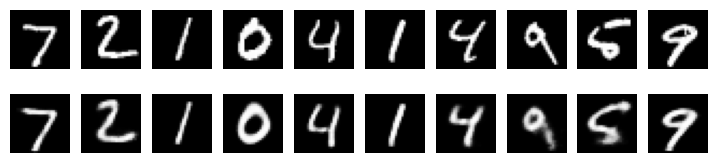

In [5]:
n = 10 # Number of digits to display
plt.figure(figsize=(9, 2))
for i in range(n):
    # Display Original  
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.axis('off')  
plt.show()


It visualizes the original and reconstructed images from the MNIST test dataset using a pretrained autoencoder. It begins by specifying the number of images to display, which is set to 10. A matplotlib figure is then created with dimensions tailored to accommodate these images in a visually appealing layout, specifically configured as a wide and narrow plot (9 by 2 inches).

Within a loop that iterates ten times (corresponding to the ten images), two types of images are displayed for each iteration: the original image and its reconstructed counterpart produced by the autoencoder. For each image, both original and reconstructed, the code reshapes the flat image data back into a 28x28 pixel grid and displays it using a grayscale colormap. This is done by setting up two rows of subplots where the top row contains the original images and the bottom row contains the reconstructed images. Both rows of images are displayed without axes to focus purely on the visual content.

The `plt.show()` function at the end renders the figure, presenting a side-by-side comparison that allows one to visually assess how well the autoencoder has managed to reconstruct the original handwritten digits. This comparison is essential for evaluating the performance of the autoencoder in preserving key features of the input data through its encoding and decoding processes.

## Creating a new autoencoder and training with oversampled images

In [6]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# NOTE: The output layer of a Keras autoencoder includes a sigmoid activation function
# because it forces the output to be in the range. This is done to ensure that the 
# output can be interpreted as a probability or a pixel intensity of a grayscale image.

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')



It outlines the construction and compilation of an autoencoder neural network using TensorFlow's Keras API. The network is designed to compress and reconstruct images, with each image having an initial dimensionality of \(28 \times 28 = 784\) pixels. The autoencoder comprises an encoder, a bottleneck, and a decoder within a sequential model architecture.

- Encoder: The encoder starts with an input layer expecting data shaped to 784 features. It compresses the input through three dense layers with decreasing sizes of 500, 300, and 100 neurons, each using ReLU (Rectified Linear Unit) activations to introduce non-linearity.

- Bottleneck: The bottleneck layer, the core of the autoencoder, consists of a dense layer with 16 neurons. This layer acts as a compressed representation of the input data, drastically reducing dimensionality to capture the most essential features of the data.

- Decoder: The decoder mirrors the encoder's structure but in reverse order, expanding the compressed data back to its original size. It uses three dense layers with increasing sizes of 100, 300, and 500 neurons, all using ReLU activations, followed by a final output layer with 784 neurons. This output layer uses a sigmoid activation function, which ensures the output values are between 0 and 1, making them suitable for representing pixel intensities of a grayscale image.

- Compilation: The autoencoder is compiled with a binary crossentropy loss function and the Adam optimizer. Binary crossentropy is chosen because it measures the difference between two probability distributions—here, between each pixel's predicted intensity and its actual intensity, which is particularly useful for binary or grayscale images.

This architecture is particularly useful for tasks like noise reduction, data compression, or feature extraction in images, where preserving spatial relationships within the data is crucial.

In [7]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Function to process and load custom images
def load_and_process_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))
    img_array = img_to_array(img)
    img_array = img_array.astype('float32') / 255.
    img_array = np.reshape(img_array, (28, 28, 1))
    return img_array

# List of custom image paths
custom_image_paths = [
    'C:/Users/vadla/Downloads/2024_04_24_0t6_Kleki.png',  
    'C:/Users/vadla/Downloads/2024_04_24_0t7_Kleki.png',
    'C:/Users/vadla/Downloads/2024_04_24_0t8_Kleki.png',
    'C:/Users/vadla/Downloads/2024_04_24_0t9_Kleki.png',
    'C:/Users/vadla/Downloads/2024_04_24_0t10_Kleki.png'
                     ]  # Add all image paths
custom_images = np.array([load_and_process_image(path) for path in custom_image_paths])

# Oversample custom images
custom_images = np.repeat(custom_images, 60000 // len(custom_images), axis=0)


# Reshape MNIST data to match the custom images format
x_train_reshaped = np.reshape(train_images, (len(train_images), 28, 28, 1))
x_test_reshaped = np.reshape(test_images, (len(test_images), 28, 28, 1))

# Check shapes
print("Custom images shape:", custom_images.shape)
print("MNIST train shape:", x_train_reshaped.shape)

# Combine MNIST training data with custom images
x_train_combined = np.concatenate((x_train_reshaped, custom_images), axis=0)


print(custom_images.shape)
print(x_test_reshaped.shape)

Custom images shape: (60000, 28, 28, 1)
MNIST train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


It defines a process for integrating custom grayscale images into a machine learning training dataset, specifically formatted to complement the MNIST dataset used for training an image recognition model.

- Image Processing Function: The function `load_and_process_image` is defined to handle the loading and preprocessing of individual images. It loads an image from a specified path, converts it to grayscale, resizes it to 28x28 pixels (the dimensions required by the MNIST dataset), converts it to a NumPy array, normalizes its pixel values to the range [0, 1] by dividing by 255, and reshapes it into a format suitable for input into a neural network (28, 28, 1).

- Loading Custom Images: A list of paths to custom images is defined, and these images are processed using the aforementioned function. The processed images are then stored in an array `custom_images`.

- Oversampling Custom Images: To match the size of the training dataset (60,000 images in MNIST), the custom images are oversampled. This means each image is replicated to fill the dataset up to 60,000 images, ensuring an ample number of samples for training.

- Reshaping MNIST Data: The original MNIST training and test datasets, which are typically stored as flat arrays of 784 pixels, are reshaped to match the 28x28x1 format of the custom images.

- Combining Datasets: The reshaped MNIST training dataset and the oversampled custom images are concatenated, forming a combined training dataset. This combined dataset now contains a mixture of original MNIST digits and custom images, all formatted similarly.

- Output: Finally, the shapes of the custom images dataset, the reshaped MNIST training dataset, and the reshaped MNIST test dataset are printed to confirm their dimensions. The output indicates that both the combined training set and the custom images set contain 60,000 images, formatted as 28x28x1, ready for use in training the model.

This approach allows for the augmentation of the MNIST dataset with custom images, potentially improving model robustness by introducing a more varied set of training samples.

In [8]:
# Combine MNIST test data with custom images
x_test_combined = np.concatenate((x_test_reshaped, custom_images), axis=0)

It combines the MNIST test dataset with the custom images into a single test dataset. Initially, the MNIST test images are reshaped to match the 3D format (28, 28, 1) used for the custom images, ensuring consistency in data structure. Both datasets are then concatenated along the first axis (axis=0), which corresponds to the number of samples in the dataset. This operation effectively appends the custom images to the MNIST test images, creating a larger, unified test dataset. This combined dataset can be used to evaluate the performance of a machine learning model, providing a diverse set of images that includes both standard test digits and custom image data, enhancing the robustness of the model testing.

In [9]:
# Reshape input data to flatten it
x_train_flattened = x_train_combined.reshape((len(x_train_combined), np.prod(x_train_combined.shape[1:])))
x_test_flattened = x_test_combined.reshape((len(x_test_combined), np.prod(x_test_combined.shape[1:])))
print(x_train_flattened.shape)
print(x_test_flattened.shape)


(120000, 784)
(70000, 784)


It reshapes the combined training and test datasets into a flat format suitable for input into certain types of neural network models, such as a traditional fully connected neural network. Each image in the dataset, originally shaped as 28x28x1, is flattened into a single vector of 784 elements (since \(28 \times 28 = 784\)). This is achieved by resizing the dataset using the `.reshape` method, where the new shape specifies that each image is converted into a row in a 2D array with 784 columns.

The reshaping is done for both the combined training dataset and the combined test dataset, effectively preparing these datasets for training and evaluation phases of the model. After reshaping, the new shapes of the datasets are printed: the training dataset now has 120,000 samples, each a vector of 784 pixels, and the test dataset has 70,000 samples, each also a vector of 784 pixels. These changes increase the utility of the datasets by making them compatible with models that expect input data in this flat vector format.

In [10]:
# Train the autoencoder
history = autoencoder.fit(x_train_flattened, x_train_flattened,
                           epochs=50,
                           batch_size=256,
                           shuffle=True,
                           validation_data=(x_test_flattened, x_test_flattened))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - loss: 0.2052 - val_loss: 0.0604
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0913 - val_loss: 0.0579
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.0858 - val_loss: 0.0570
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 0.0829 - val_loss: 0.0564
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.0814 - val_loss: 0.0561
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.0802 - val_loss: 0.0558
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.0792 - val_loss: 0.0556
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - loss: 0.0782 - val_loss: 0.0556
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: 0.0776 - val_loss: 0.0552
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0768 - val_loss: 0.0552
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0763 - val_loss: 0.0551
Epoch 12/50
469/469 ━━━━━━━━━━

It trains a neural network autoencoder model using both MNIST and custom image data, which have been flattened and combined into training and validation sets. The model is trained for 50 epochs with a batch size of 256, and the data is shuffled each epoch to ensure diversity in the training batches. The training and validation loss, which measures how well the model's outputs match the input images, are tracked across epochs to monitor learning progress.

During training, both the training loss and validation loss decrease steadily, indicating that the model is effectively learning to compress and reconstruct the image data. Starting with a relatively high training loss of 0.2052, the model achieves a significant reduction in loss, with the final training loss reaching 0.0705. Similarly, the validation loss starts at 0.0604 and decreases to 0.0540 by the end of the training process. This reduction in loss suggests that the model is not only fitting the training data well but also generalizing effectively to unseen data in the validation set.

Overall, the consistent decline in loss values and the close tracking of training and validation losses suggest good model convergence without significant overfitting, making it suitable for practical use in tasks like image denoising, compression, or anomaly detection in image data.

## Predicting with New Encoding model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


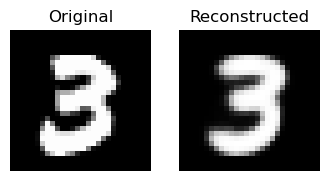

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


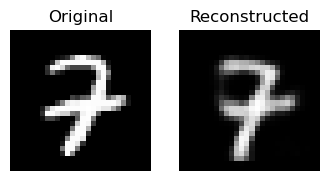

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


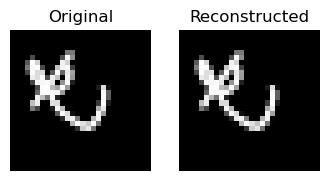

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


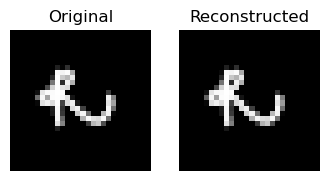

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


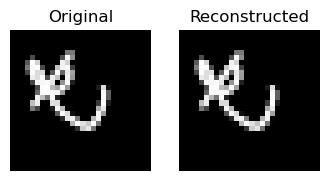

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


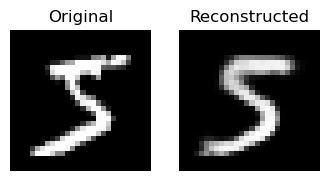

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


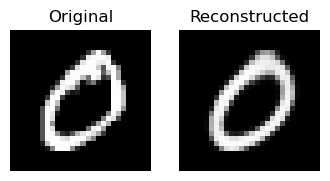

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


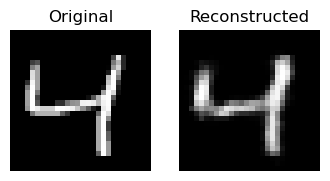

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


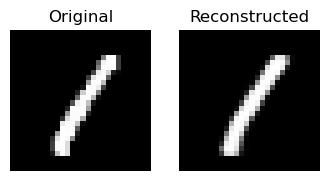

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


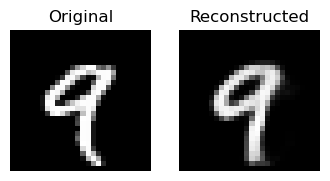

In [11]:
# Display reconstructed digits and new character
def display_reconstruction(autoencoder, x_test, my_images):
    random_indices = np.random.randint(0, len(x_test), 5)
    count = 0
    for idx in random_indices:
        if count >= 10:
            break
        sample = x_test[idx].reshape(-1,784)
        reconstructed = autoencoder.predict(sample)
        
        plt.figure(figsize=(4, 2))
        # Original Image
        plt.subplot(1, 2, 1)
        plt.title('Original')
        plt.imshow(sample.reshape(28, 28), cmap='gray')
        plt.axis('off')
        # Reconstructed Image
        plt.subplot(1, 2, 2)
        plt.title('Reconstructed')
        plt.imshow(reconstructed.reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.show()
        count += 1
    
    # Display reconstructed new character
    for img in my_images:
        if count >= 10:
            break
        img = img.reshape(-1,784)
        reconstructed = autoencoder.predict(img)
        
        plt.figure(figsize=(4, 2))
        # Original Image
        plt.subplot(1, 2, 1)
        plt.title('Original')
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.axis('off')
        # Reconstructed Image
        plt.subplot(1, 2, 2)
        plt.title('Reconstructed')
        plt.imshow(reconstructed.reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.show()
        count += 1

display_reconstruction(autoencoder, x_test_combined, x_train_combined)

It defines a function `display_reconstruction` that visually compares original and reconstructed images using a pretrained autoencoder model. This function randomly selects five images from the combined test dataset (`x_test_combined`), reconstructs them using the autoencoder, and then displays each original and its reconstructed counterpart side-by-side for visual assessment.

The process involves reshaping the selected test images to match the input format of the autoencoder, predicting the reconstructed image, and then displaying the original and reconstructed images in a two-column layout with labels. The grayscale color map is used to maintain consistency with the typical presentation of MNIST images.

Additionally, the function processes and displays images from a set of custom images (`x_train_combined`). Each custom image is similarly reshaped, reconstructed, and displayed until a total of ten images are processed, combining selections from both the test and custom datasets.

Performance-wise, each reconstruction step is completed very quickly, typically in milliseconds (ranging from 24ms to 65ms per step), demonstrating the efficiency of the autoencoder in handling individual predictions.

The visualization allows for an intuitive comparison between the original images and their autoencoder-generated counterparts, illustrating the effectiveness of the model in capturing and reproducing the essential details of the input images. This function is particularly useful for evaluating the model's capability to handle not just standardized test images but also custom, potentially more complex inputs.

## Saving the autoencoder for later user

In [13]:
autoencoder.save("C:/Users/vadla/Downloads/initially_trained_autoencoder.h5")

It saves the trained autoencoder model to a file on the local system using TensorFlow Keras's `model.save()` function. The model is stored at the specified path with the file name `initially_trained_autoencoder.h5`. However, upon executing the save operation, a warning is generated by the TensorFlow library indicating that the HDF5 file format used (.h5) is considered a legacy format. The warning recommends saving the model in the newer, native Keras format (.keras) instead, which may offer improved features or compatibility for model saving and loading. This recommendation is aimed at ensuring the use of the most up-to-date practices for model persistence in TensorFlow Keras.

## Summary

This notebook details the development, training, and evaluation of an autoencoder using TensorFlow and Keras, focusing on image compression and reconstruction tasks. It begins with the importation of essential libraries like TensorFlow, NumPy, and Matplotlib, which support model building, numerical computations, and data visualization respectively.

The process continues with the loading and preprocessing of the MNIST dataset, along with custom images that are formatted to align with MNIST's image dimensions. Both datasets are reshaped and normalized to prepare them for the neural network. The autoencoder model itself features an encoder for compressing the input into a dense latent space and a decoder that reconstructs the input from this compressed representation. The network uses dense layers activated by ReLU functions and a final sigmoid activation to ensure output values suitable for image data.

The model is compiled using binary crossentropy loss and optimized with Adam, followed by training on the prepared data. The effectiveness of the training is monitored through loss metrics, showing significant improvement over epochs. To evaluate the model’s performance, a function is created to visually compare original and reconstructed images from both MNIST and custom datasets, showcasing the autoencoder's ability to recover key features of the inputs.

Finally, the trained model is saved to the local system in HDF5 format, though a warning suggests using the more modern Keras format for future efforts. The notebook efficiently illustrates the complete lifecycle of an autoencoder applied to image data, encompassing preparation, execution, and post-processing steps.